In [1]:
#Relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



In [2]:
#importing the data

df = pd.read_csv('../data/tweets_cleaned_eda.csv')

In [3]:
df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
0,0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,61
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,115
2,2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,60
3,3,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account . like isl...,103
4,4,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,131


In [4]:
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [5]:
#Replacing categories with numeric category column

df['cyberbullying_type'].replace(['not_cyberbullying', 'gender', 'religion','age', 'ethnicity','other_cyberbullying'],
                        [0, 1, 2, 3, 4, 5], inplace=True)

df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
0,0,"In other words #katandandre, your food was cra...",0,word katandandre food crapilicious mkr,61
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,0,aussietv white mkr theblock imacelebrityau tod...,115
2,2,@XochitlSuckkks a classy whore? Or more red ve...,0,classy whore red velvet cupcake,60
3,3,@RudhoeEnglish This is an ISIS account pretend...,0,isi account pretend kurdish account . like isl...,103
4,4,"@Raja5aab @Quickieleaks Yes, the test of god i...",0,yes test god good bad indifferent weird whatev...,131


In [6]:
#Removing NaN cleaned tweets
df[df['cleaned_tweets'].isna()]

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length
377,377,@kylieminogue @muse,0,NaN,19
1102,1102,@CanadianSpider how are you?,0,NaN,28
1136,1136,@TakeAStand2Day,0,NaN,15
2134,2134,@itvnews @mittromney @barackobama @robertmooreitv,0,NaN,49
2173,2173,That is all,0,NaN,11
3147,3147,@jarihimanen How so?,0,NaN,20
3674,3674,Why?,0,NaN,4
4600,4600,@TheyLOVEJayP or what,0,NaN,21
4629,4629,@g56yu Who?,0,NaN,12
5288,5288,Just NOW?!?!? 😄😃😀,0,NaN,18


In [7]:
#dropping the NA files
df = df.dropna()
df[df['cleaned_tweets'].isna()]

,Unnamed: 0,tweet_text,cyberbullying_type,cleaned_tweets,tweet_length


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

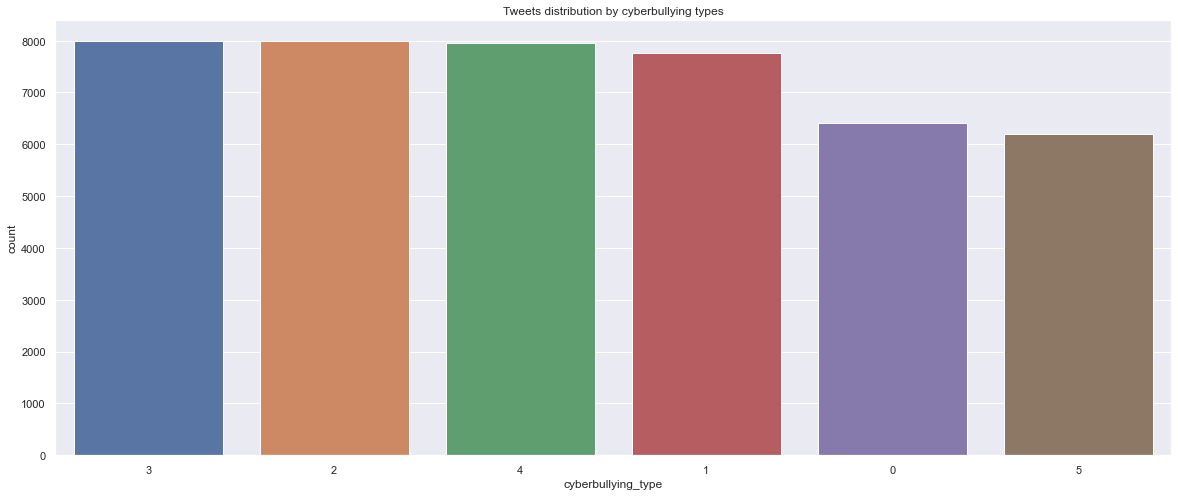

In [8]:
#Checking the differtent catergoies after cleaning tweets
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [9]:
#Encoding the text data
tv = TfidfVectorizer(max_features=500, stop_words='english', ngram_range = (5,5))
tweets_transformed = tv.fit_transform(df['cleaned_tweets'])
print(tweets_transformed)

  (68, 130)	1.0
  (145, 467)	0.44721359549995787
  (145, 113)	0.44721359549995787
  (145, 114)	0.44721359549995787
  (145, 465)	0.44721359549995787
  (145, 102)	0.44721359549995787
  (285, 155)	0.2912069772324207
  (285, 438)	0.2912069772324207
  (285, 19)	0.2912069772324207
  (285, 207)	0.2912069772324207
  (285, 257)	0.2912069772324207
  (285, 290)	0.2912069772324207
  (285, 338)	0.2912069772324207
  (285, 416)	0.28445203992699947
  (285, 66)	0.28445203992699947
  (285, 206)	0.28445203992699947
  (285, 495)	0.28445203992699947
  (285, 58)	0.28764148310626175
  (717, 53)	0.4099900153613248
  (717, 259)	0.4099900153613248
  (717, 50)	0.4099900153613248
  (717, 429)	0.4099900153613248
  (717, 273)	0.4099900153613248
  (717, 350)	0.39942575845844397
  (724, 250)	1.0
  :	:
  (44187, 339)	0.39597554135199037
  (44187, 482)	0.31378742470394116
  (44187, 319)	0.31378742470394116
  (44197, 140)	1.0
  (44198, 397)	1.0
  (44210, 138)	1.0
  (44214, 269)	0.8333945335339181
  (44214, 397)	0.552678

In [10]:
#Creating a dataframe from encoded text and adding it to the original dataframe
tweets_transformed_df = pd.DataFrame(tweets_transformed.toarray(),
                     columns=tv.get_feature_names())\
                               .add_prefix('Counts_')


/Users/rushikeshbattulwar/opt/anaconda3/envs/mlops/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
df_transformed = pd.concat([tweets_transformed_df.reset_index().drop(columns='index') , df['cyberbullying_type'].reset_index().drop(columns='index')],
                            axis=1, sort=False)
df_transformed.shape

(44320, 501)

In [12]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop(columns='cyberbullying_type'), 
                                                    df_transformed.cyberbullying_type, test_size=0.3, 
                                                    random_state=47, stratify = df_transformed.cyberbullying_type)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31024, 500) (13296, 500) (31024,) (13296,)


In [14]:
df_transformed.head()

,Counts__smyth fuck black nigger ugly,Counts__zappe fuck dumb nigger obama,Counts_acquittal christian woman blasphemy case,Counts_act like baby school yard,Counts_act like high school bully,Counts_admit fake apology win vote,Counts_african american special need student,Counts_al franken talk infant rape,Counts_american boy boy crack rape,Counts_american christian woman human right,...,Counts_white people black uncle tom,Counts_white people especially defend racist,Counts_win vote joke gay republican,Counts_write porn rama say fantasize,Counts_www hbhliveapparel com send positive,Counts_year prison term violent protest,Counts_yr old sam land decapolis,Counts_yur white clothes wash black,Counts_yurrr maddd rt fuck obama,cyberbullying_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
df_transformed.to_csv('../data/train_tweets.csv')